## **KELOMPOK 11 2023B :**
## **- Maysahayu Artika Maharani (214)**

- Link YouTube Final Proyek :

- Link YouTube Progres Proyek : https://youtu.be/0pX8U_HT-ks

- Proses Scraping
https://colab.research.google.com/drive/11rkGCr4K9-RkEWaM0wNjYgZGqXhoTewU?usp=sharing

- dataset webtoon
https://docs.google.com/spreadsheets/d/1iMjI7DYaexUPCbGx_JdlqKEtLuqHQe5y/edit?usp=sharing&ouid=107334502759394564923&rtpof=true&sd=true


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time

In [ ]:
path = '/content/drive/MyDrive/Pemteks/scrap_webtoon.xlsx'
df = pd.read_excel(path)
df

,judul_komik,author,ringkasan,genre
0,LOOKISM,Taejoon Park,Cowok ini punya 2 wujud! Pilih yang mana ya..?,drama
1,The Real Lesson,CHAE YONGTAEK / HAN GARAM,Setelah undang-undang larangan memukul para si...,drama
2,Undercover at Chaebol High,AJ,"Lee Dakyung, anggota sebuh organisasi gelap, t...",drama
3,GOOD/BAD FORTUNE,Ariel Duyung,"Hati-hati! Jika bertemu mereka, nasib kalian a...",drama
4,QUESTISM,PTJ cartoon company Academy,Kim Soohyun selalu merasa lemah dan tak bisa m...,drama
...,...,...,...,...
1518,SCRAMBLED: Journeylism,Lintankleen,Visi adalah seorang siswi SMA yang pemalu. Saa...,drama
1519,Dracko Diary,Indra AD,Dracko kini pergi merantau demi mengejar cita-...,drama
1520,Perhaps Mine,Cikakey / Candrasa,Mine yang baru saja dipecat karena suatu insid...,drama
1521,Summer Rain,kiyoshin_,Banyak hal aneh terjadi saat hujan panas. Sala...,drama


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   judul_komik  1523 non-null   object
 1   author       1521 non-null   object
 2   ringkasan    1523 non-null   object
 3   genre        1523 non-null   object
dtypes: object(4)
memory usage: 47.7+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop(['judul_komik', 'author'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1521 entries, 0 to 1522
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ringkasan  1521 non-null   object
 1   genre      1521 non-null   object
dtypes: object(2)
memory usage: 35.6+ KB


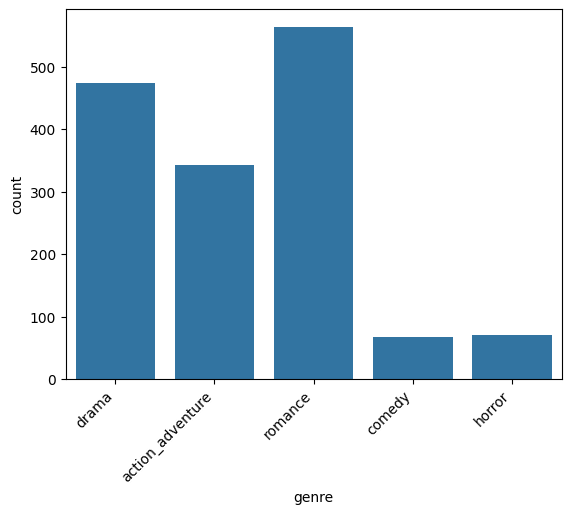

In [ ]:
sns.countplot(x=df['genre'])
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df['genre'].value_counts()

,count
genre,
romance,564
drama,475
action_adventure,343
horror,71
comedy,68


## Preproses

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
import re, nltk
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
Sastrawi_StopWords_id = factory.get_stop_words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def processed_text(text):
    text = text.lower()

    # Perbaiki escape sequence dengan menambahkan `r` sebelum string regex
    text = re.sub(r'[“”‘’"\'—♥︎]', '', text)
    text = ' '.join(re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text)

    # Hilangkan tanda baca dan angka
    punct = str.maketrans('', '', string.punctuation + string.digits)
    text = text.translate(punct)

    # Tokenisasi dan menghapus stopwords
    tokens = word_tokenize(text)
    filtered_words = [w for w in tokens if w not in Sastrawi_StopWords_id]

    # Lematisasi kata
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]

    # Menggabungkan kembali menjadi teks
    text = " ".join(lemma_words)
    return text

In [ ]:
df['ringkasan_clean'] = df['ringkasan'].apply(lambda x: processed_text(x) if isinstance(x, str) else x)

In [ ]:
df['ringkasan_clean'].describe()


,ringkasan_clean
count,1521
unique,1113
top,tahun pertama sma nana kesulitan berteman bert...
freq,4


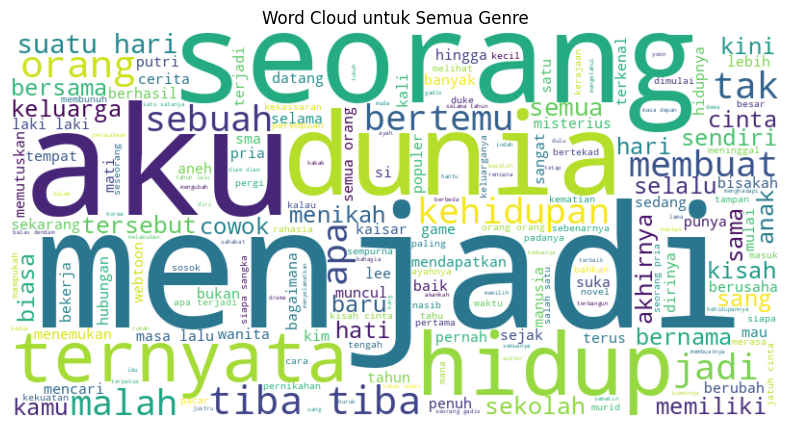

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(review for review in df['ringkasan_clean'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Semua Genre')
plt.show()


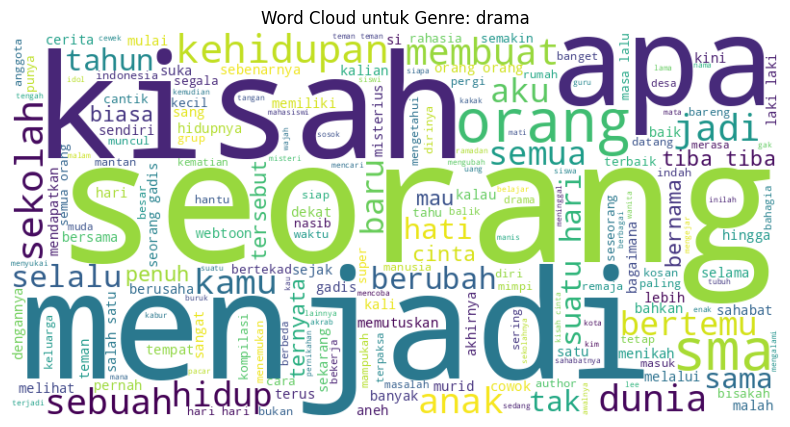

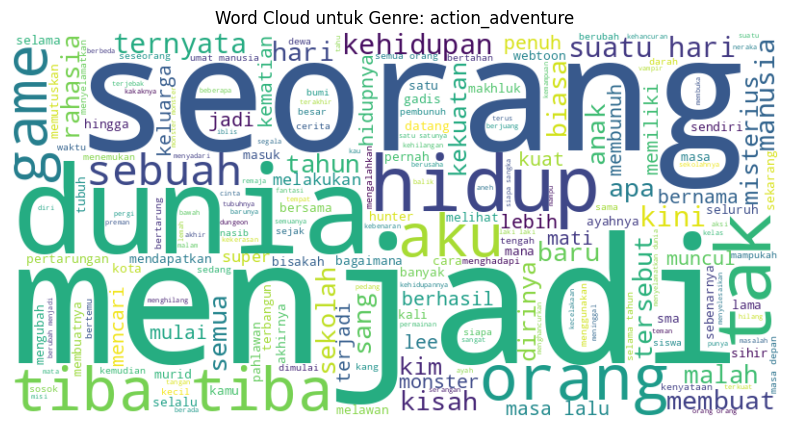

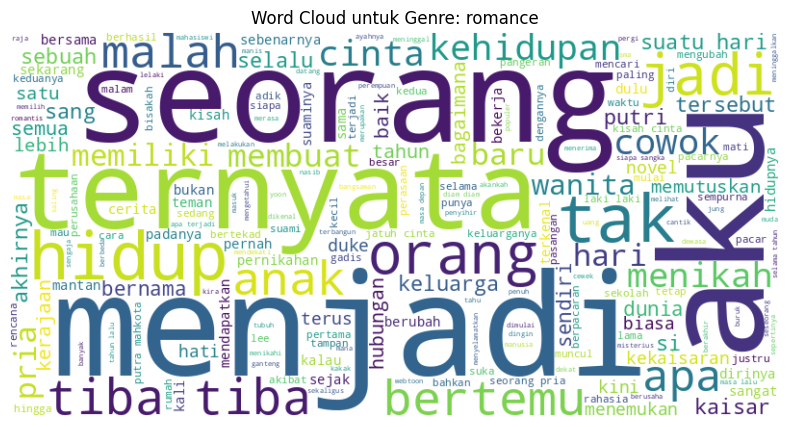

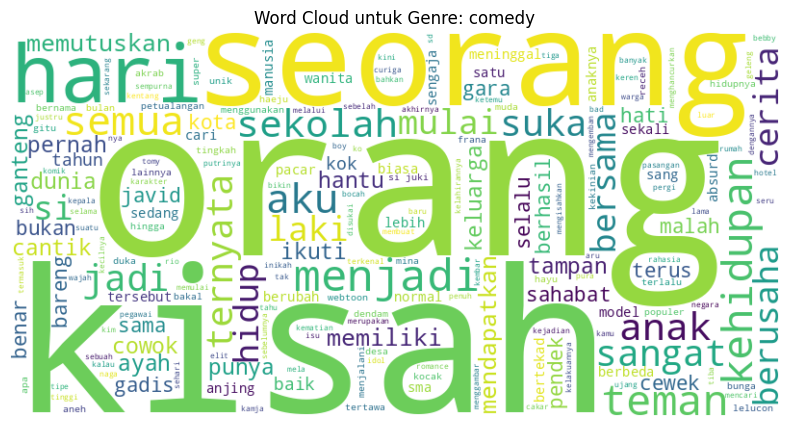

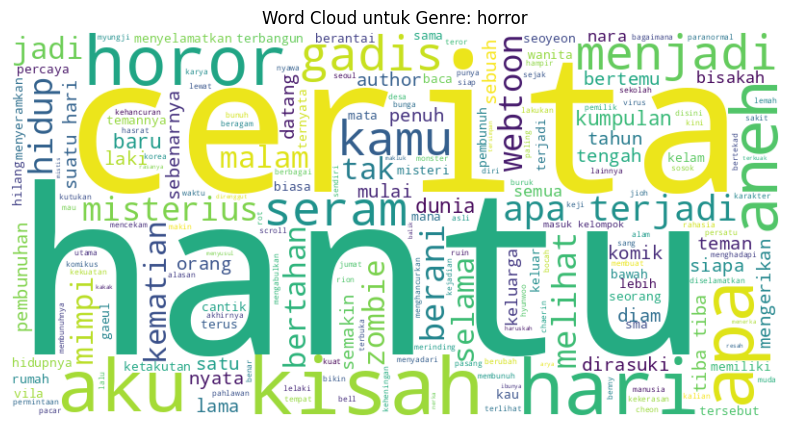

In [ ]:
for genre in df['genre'].unique():
    text = " ".join(review for review in df[df['genre'] == genre]['ringkasan_clean'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud untuk Genre: {genre}')
    plt.show()


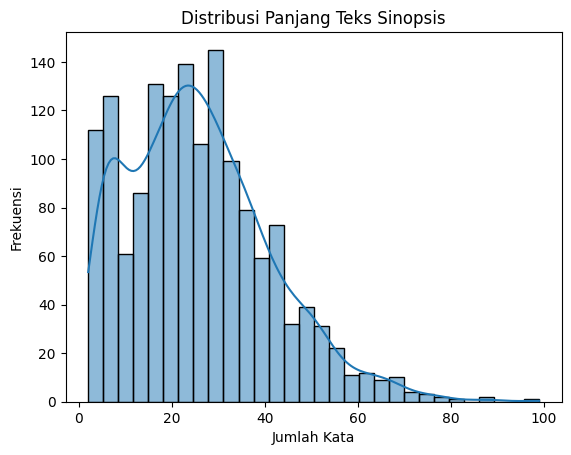

In [ ]:
df['length'] = df['ringkasan_clean'].apply(lambda x: len(x.split()))
sns.histplot(df['length'], bins=30, kde=True)
plt.title('Distribusi Panjang Teks Sinopsis')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()


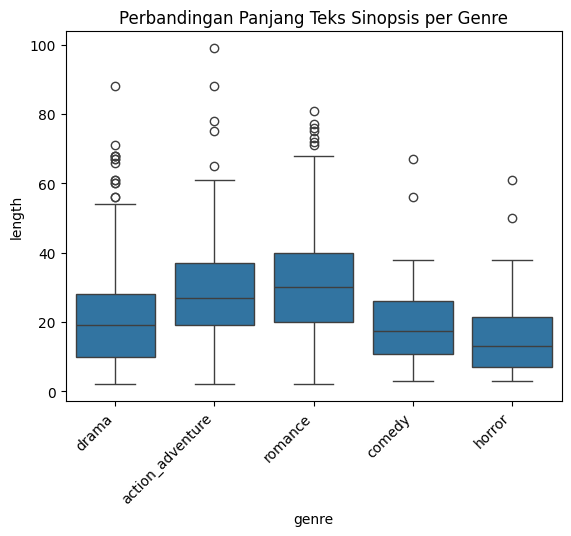

In [ ]:
sns.boxplot(x='genre', y='length', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Perbandingan Panjang Teks Sinopsis per Genre')
plt.show()


In [ ]:
# df.to_excel('data_webtoon_clean.xlsx', index=False )
# df.head()

## Sampling Data

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Pemteks/data_webtoon_clean.xlsx')

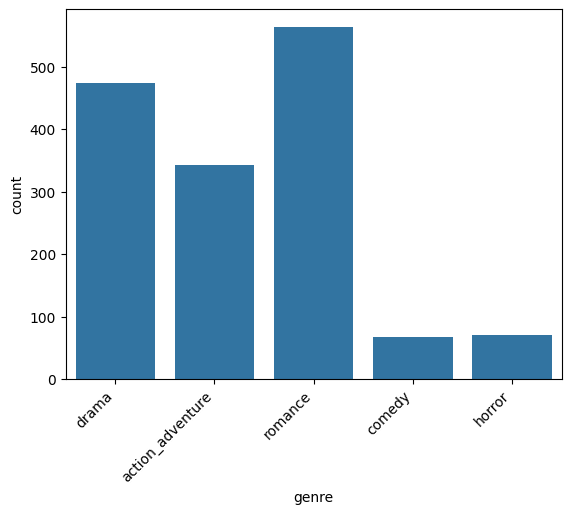

In [ ]:
sns.countplot(x=df['genre'])
plt.xticks(rotation=45, ha='right')
plt.show()

## Random Oversampling

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


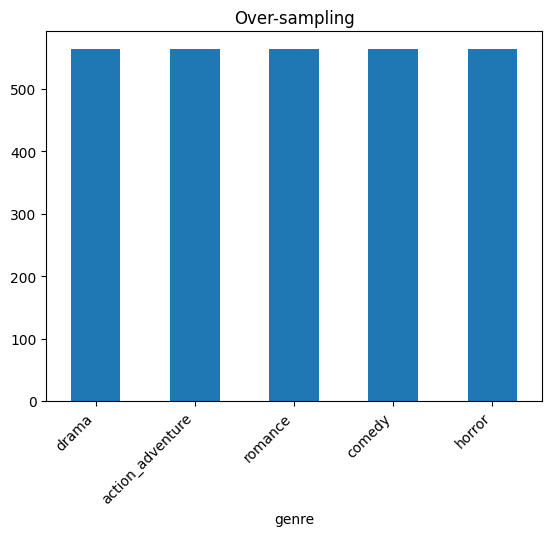

,count
genre,
drama,564
action_adventure,564
romance,564
comedy,564
horror,564


In [ ]:
from imblearn.over_sampling import RandomOverSampler

y = df['genre']

# Menghitung jumlah sampel untuk setiap kelas
unique_classes, class_counts = np.unique(y, return_counts=True)

# Menentukan sampling_strategy sebagai dictionary
sampling_strategy = {class_name: int(max(class_counts)) for class_name in unique_classes}

X = df[['ringkasan_clean']]

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_res, y_res = ros.fit_resample(X, y)
y_res_series = pd.Series(y_res)
X_res_series = pd.Series(X_res['ringkasan_clean'].values)

# Gunakan y_res_series (pandas Series) alih-alih y_res (NumPy array)
ax = y_res_series.value_counts().plot.bar()
_ = ax.set_title("Over-sampling")
plt.xticks(rotation=45, ha='right')
plt.show()
# Class distribution
y_res_series.value_counts()

## Feature Engineering

### BOW

In [ ]:
X = X_res_series
y = y_res_series

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Melihat Jumlah Fitur
print(len(vectorizer.get_feature_names_out()))

6385


In [ ]:
X_bow = X.toarray() # X is already transformed, just convert to dense array
X_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### Feature Selection BOW

In [ ]:
data_bow = pd.DataFrame(X_bow, columns=vectorizer.get_feature_names_out())
X = np.array(data_bow)
y = np.array(y)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Ten features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k=5000)
X_kbest_features = chi2_features.fit_transform(X, y)

# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 6385
Reduced feature number: 5000


#### Seleksi Model dengan BOW

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=42)

models = {'Multinomial Naive Bayes': MultinomialNB(),
          'Linier SVC': svm.LinearSVC(random_state=42),
          'Random Forest': RandomForestClassifier(random_state=42)
          }

In [ ]:
# Validasi silang model
for name, model in models.items():
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start
    CV = KFold(n_splits = 5, shuffle = True, random_state = 42)
    scores = cross_val_score(model, X_train, y_train, cv = CV)
    print(model)
    print("\tWaktu latih: %0.3fs" % train_time)
    print("\tWaktu prediksi: %0.3fs" % predict_time)
    print('\t5-Fold Validation Scores:', scores)
    print('\tCross Validation Training Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MultinomialNB()
	Waktu latih: 0.164s
	Waktu prediksi: 0.017s
	5-Fold Validation Scores: [0.74336283 0.73392461 0.77827051 0.79822616 0.73170732]
	Cross Validation Training Accuracy: 0.757 (0.026)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

LinearSVC(random_state=42)
	Waktu latih: 0.655s
	Waktu prediksi: 0.010s
	5-Fold Validation Scores: [0.73893805 0.75388027 0.75166297 0.77605322 0.74722838]
	Cross Validation Training Accuracy: 0.754 (0.012)
RandomForestClassifier(random_state=42)
	Waktu latih: 9.986s
	Waktu prediksi: 0.054s
	5-Fold Validation Scores: [0.74336283 0.75609756 0.76718404 0.79600887 0.7383592 ]
	Cross Validation Training Accuracy: 0.760 (0.021)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Metrik evaluasi
results = dict()
for name, model in models.items():
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    print('\nAlgorithm: ', name)
    res_cm = confusion_matrix(y_test, predicted)
    print('Confusion Matrix:\n', res_cm)
    res_acc = accuracy_score(y_test, predicted)
    print('Accuracy: ', res_acc)
    res_pres = precision_score(y_test, predicted, average='micro')
    print('Precision: ', res_pres)
    res_recall = recall_score(y_test, predicted, average='micro')
    print('Recall Score: ', res_recall)
    res_f1 = f1_score(y_test, predicted, average='micro')
    print('F1 Score: ', res_f1)

    results[name]=res_acc


Algorithm:  Multinomial Naive Bayes
Confusion Matrix:
 [[ 85   3  15   6   5]
 [  3 101   0   0   0]
 [ 14  16  58   5  14]
 [  0   0   0 123   0]
 [ 10   4  14   3  85]]
Accuracy:  0.8014184397163121
Precision:  0.8014184397163121
Recall Score:  0.8014184397163121
F1 Score:  0.8014184397163121


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Algorithm:  Linier SVC
Confusion Matrix:
 [[ 78   6  21   4   5]
 [  0 104   0   0   0]
 [ 20  16  55   4  12]
 [  0   0   0 123   0]
 [ 13   6  21   1  75]]
Accuracy:  0.7712765957446809
Precision:  0.7712765957446809
Recall Score:  0.7712765957446809
F1 Score:  0.7712765957446809

Algorithm:  Random Forest
Confusion Matrix:
 [[ 82   3  20   2   7]
 [  0 104   0   0   0]
 [ 15  15  61   3  13]
 [  0   0   0 123   0]
 [  7   2  24   1  82]]
Accuracy:  0.8014184397163121
Precision:  0.8014184397163121
Recall Score:  0.8014184397163121
F1 Score:  0.8014184397163121


### TFIDF

In [ ]:
X = X_res_series
y = y_res_series

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

6385


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Feature Selection TFIDF

In [ ]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Ten features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k=5000)
X_kbest_features = chi2_features.fit_transform(X, y)

# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 6385
Reduced feature number: 5000


#### Seleksi Model dengan TFIDF

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=42)

models = {'Multinomial Naive Bayes': MultinomialNB(),
          'Linier SVC': svm.LinearSVC(random_state=42),
          'Random Forest': RandomForestClassifier(random_state=42)
          }

In [ ]:
# Validasi silang model
for name, model in models.items():
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start
    CV = KFold(n_splits = 5, shuffle = True, random_state = 42)
    scores = cross_val_score(model, X_train, y_train, cv = CV)
    print(model)
    print("\tWaktu latih: %0.3fs" % train_time)
    print("\tWaktu prediksi: %0.3fs" % predict_time)
    print('\t5-Fold Validation Scores:', scores)
    print('\tCross Validation Training Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MultinomialNB()
	Waktu latih: 0.075s
	Waktu prediksi: 0.008s
	5-Fold Validation Scores: [0.74336283 0.74722838 0.78713969 0.78713969 0.73392461]
	Cross Validation Training Accuracy: 0.760 (0.023)
LinearSVC(random_state=42)
	Waktu latih: 0.154s
	Waktu prediksi: 0.007s
	5-Fold Validation Scores: [0.75884956 0.77161863 0.78713969 0.79600887 0.76274945]
	Cross Validation Training Accuracy: 0.775 (0.014)
RandomForestClassifier(random_state=42)
	Waktu latih: 10.330s
	Waktu prediksi: 0.271s
	5-Fold Validation Scores: [0.74557522 0.75609756 0.76718404 0.7804878  0.7405765 ]
	Cross Validation Training Accuracy: 0.758 (0.015)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Metrik evaluasi
results = dict()
for name, model in models.items():
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    print('\nAlgorithm: ', name)
    res_cm = confusion_matrix(y_test, predicted)
    print('Confusion Matrix:\n', res_cm)
    res_acc = accuracy_score(y_test, predicted)
    print('Accuracy: ', res_acc)
    res_pres = precision_score(y_test, predicted, average='micro')
    print('Precision: ', res_pres)
    res_recall = recall_score(y_test, predicted, average='micro')
    print('Recall Score: ', res_recall)
    res_f1 = f1_score(y_test, predicted, average='micro')
    print('F1 Score: ', res_f1)

    results[name]=res_acc



Algorithm:  Multinomial Naive Bayes
Confusion Matrix:
 [[ 86   2  12   6   8]
 [  0 104   0   0   0]
 [ 17  17  54   5  14]
 [  0   0   0 123   0]
 [  9   6  11   4  86]]
Accuracy:  0.8031914893617021
Precision:  0.8031914893617021
Recall Score:  0.8031914893617021
F1 Score:  0.8031914893617021

Algorithm:  Linier SVC
Confusion Matrix:
 [[ 84   2  20   3   5]
 [  0 104   0   0   0]
 [ 20  15  54   4  14]
 [  0   0   0 123   0]
 [ 10   3  16   1  86]]
Accuracy:  0.799645390070922
Precision:  0.799645390070922
Recall Score:  0.799645390070922
F1 Score:  0.799645390070922

Algorithm:  Random Forest
Confusion Matrix:
 [[ 84   2  19   2   7]
 [  0 104   0   0   0]
 [ 18  15  58   3  13]
 [  0   0   0 123   0]
 [ 10   1  17   1  87]]
Accuracy:  0.8085106382978723
Precision:  0.8085106382978723
Recall Score:  0.8085106382978723
F1 Score:  0.8085106382978723


## Output

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Train the LinearSVC model with TF-IDF features
model = svm.LinearSVC(random_state=42)
model.fit(X_train, y_train)

# Input from the user
user_input = input("Masukkan ringkasan komik Anda: ")

# Preprocess the user input
user_input_processed = processed_text(user_input)

# Transform the user input using the TF-IDF vectorizer
user_input_tfidf = tf_idf.transform([user_input_processed]).toarray()

# Feature Selection for user input
user_input_kbest = chi2_features.transform(user_input_tfidf)

# Predict the genre
predicted_genre = model.predict(user_input_kbest)

# Print the predicted genre
print("Prediksi genre:", predicted_genre[0])

Masukkan ringkasan komik Anda: hantu bajak laut itu mengikutimu
Prediksi genre: horror


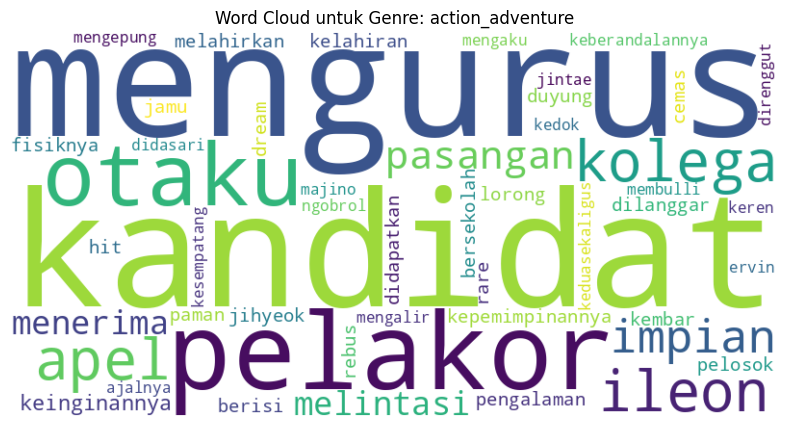

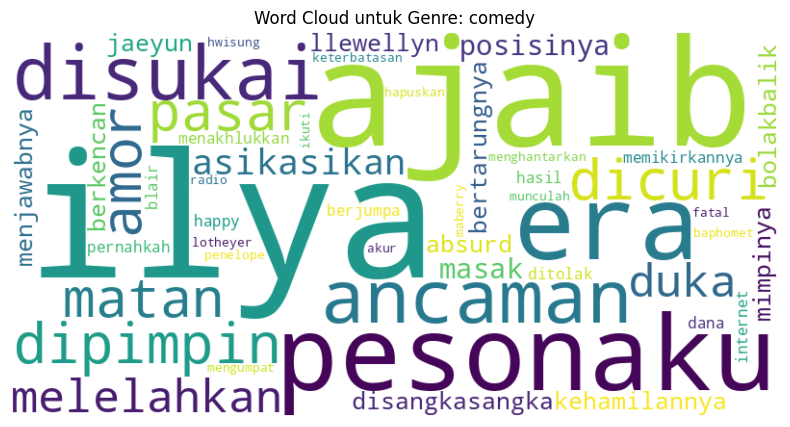

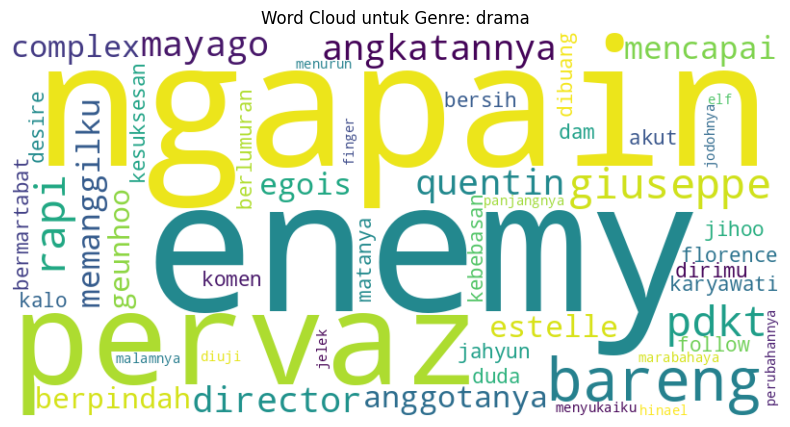

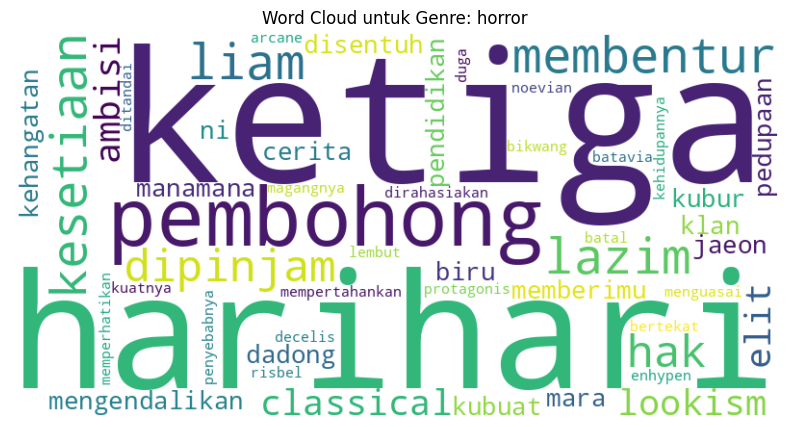

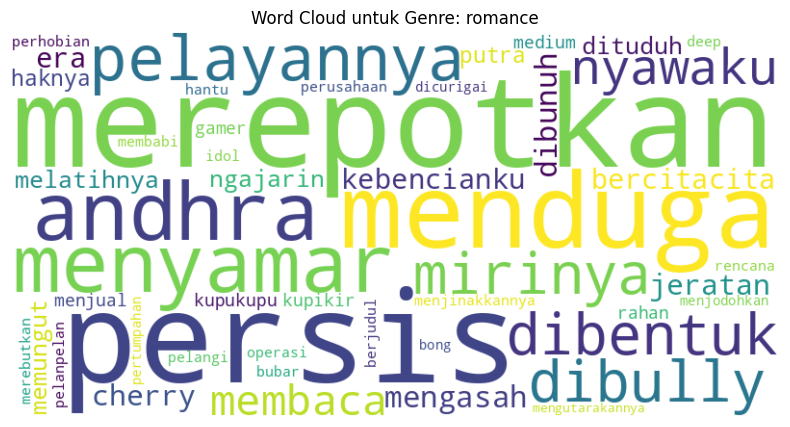

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Train the LinearSVC model with TF-IDF features
model = svm.LinearSVC(random_state=42)
model.fit(X_train, y_train)

# Mendapatkan nama-nama fitur dari TF-IDF
feature_names = tf_idf.get_feature_names_out()

# Mendapatkan koefisien dari model yang telah dilatih
coefficients = model.coef_

# Iterasi melalui setiap genre
for i, genre in enumerate(model.classes_):
    # Mendapatkan 50 fitur teratas untuk genre saat ini
    top_features_indices = np.argsort(coefficients[i])[-50:]  # Mendapatkan indeks dari 50 fitur teratas
    top_features = [feature_names[j] for j in top_features_indices]

    # Membuat string dari fitur-fitur teratas
    text = " ".join(top_features)

    # Membuat word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Menampilkan word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Menyembunyikan sumbu
    plt.title(f"Word Cloud untuk Genre: {genre}")
    plt.show()

In [ ]:
# prompt: cara menampilkan 10 kata frekuensi/bobot tertinggi pada BOW

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

# Assuming 'data_bow' DataFrame from your existing code
# ... (your existing code for creating data_bow) ...

# Calculate word frequencies
word_frequencies = data_bow.sum(axis=0)

# Sort words by frequency in descending order
top_10_words = word_frequencies.sort_values(ascending=False).head(10)  # Changed to head(10)

# Display the top 10 words and their frequencies
print("Top 10 kata dan frekuensi:")
for word, frequency in top_10_words.items():  # Iterating to display word and frequency
    print(f"{word}: {frequency}")

Top 10 kata dan frekuensi:
dunia: 371
hidup: 364
kisah: 325
kehidupan: 274
tahun: 245
tibatiba: 243
anak: 216
bertemu: 212
cinta: 211
sekolah: 203


In [ ]:
# prompt: cara menampilkan 10 kata frekuensi/bobot tertinggi pada tfidf

from sklearn.feature_extraction.text import TfidfVectorizer

# ... (your existing code) ...

# Assuming 'data_tf_idf' DataFrame from your existing code
# ... (your existing code for creating data_tf_idf) ...

# Calculate TF-IDF word frequencies
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X_res_series)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Sum TF-IDF values across all documents for each word
word_tfidf_scores = X_tfidf.sum(axis=0)

# Create a dictionary to store word and its tfidf score
word_tfidf_dict = dict(zip(feature_names, word_tfidf_scores.A1))


# Sort words by TF-IDF score in descending order and take the top 10
top_10_tfidf_words = dict(sorted(word_tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:10])

# Display the top 10 words and their TF-IDF scores
print("Top 10 Kata dan TF-IDF Scores:")
top_10_tfidf_words

Top 10 Kata dan TF-IDF Scores:


{'dunia': 51.92501227709784,
 'kisah': 42.98556105821588,
 'hantu': 38.51393742206236,
 'hidup': 37.8581183347754,
 'kehidupan': 35.16507278737393,
 'cerita': 34.12247152267076,
 'webtoon': 31.986340627337697,
 'sekolah': 31.13305914161899,
 'berubah': 30.564126311565445,
 'si': 30.109936208507204}

### Word2Vec

In [ ]:
X = X_res_series
y = y_res_series

In [ ]:
import os
import gensim

model_path = "webtoon_word2vec_gensim.model"
sentences = X_res_series.apply(lambda text: gensim.utils.simple_preprocess(str(text)) if not isinstance(text, float) else []).tolist()
model = gensim.models.word2vec.Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4, sg=0)
model.save(model_path)
model = gensim.models.Word2Vec.load(model_path)

# Melihat Jumlah Fitur
print(len(model.wv.index_to_key))

# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(model.wv.index_to_key)

2155
['dunia', 'hidup', 'kisah', 'kehidupan', 'tahun', 'tibatiba', 'anak', 'bertemu', 'cinta', 'sekolah', 'sang', 'si', 'memiliki', 'keluarga', 'cerita', 'hantu', 'berubah', 'manusia', 'webtoon', 'gadis', 'teman', 'aneh', 'sma', 'hidupnya', 'wanita', 'misterius', 'penuh', 'pria', 'berhasil', 'bernama', 'memutuskan', 'kematian', 'cowok', 'rumah', 'dendam', 'hati', 'berusaha', 'bertahan', 'suka', 'waktu', 'kekuatan', 'cantik', 'mencari', 'rahasia', 'game', 'pacar', 'muda', 'tampan', 'muncul', 'lee', 'kim', 'terbangun', 'membunuh', 'super', 'lakilaki', 'menikah', 'malam', 'orangorang', 'tubuh', 'hubungan', 'putri', 'bertekad', 'ayah', 'kota', 'menyelamatkan', 'author', 'menemukan', 'duke', 'desa', 'monster', 'menjalani', 'berbeda', 'cewek', 'sosok', 'mengubah', 'horor', 'meninggal', 'mati', 'jatuh', 'kuat', 'pergi', 'sahabat', 'terkenal', 'populer', 'mengerikan', 'komik', 'pembunuh', 'ganteng', 'nasib', 'novel', 'seram', 'ayahnya', 'utama', 'keluarganya', 'pahlawan', 'bareng', 'baca', 'ka

In [ ]:
import numpy as np

def document_vector(text, model):
    tokens = gensim.utils.simple_preprocess(str(text))  # Preprocess text
    vectors = [model.wv[token] for token in tokens if token in model.wv]  # Get word vectors for known words
    if vectors:  # Check if any word vectors were found
        return np.mean(vectors, axis=0)  # Average word vectors
    else:
        return np.zeros(model.vector_size)  # Return zero vector for empty texts

X_wv = X_res_series.apply(lambda text: document_vector(text, model)).to_numpy()

X_wv = np.vstack(X_wv)
X_wv

array([[-0.21714117,  0.13091743, -0.00281352, ..., -0.23633593,
         0.06982934, -0.07732274],
       [-0.35517439,  0.21733274,  0.01113167, ..., -0.39090112,
         0.11231062, -0.12510279],
       [-0.30958506,  0.19185881,  0.0088157 , ..., -0.34591037,
         0.09762558, -0.1134114 ],
       ...,
       [-0.14386643,  0.09188793,  0.00351956, ..., -0.16205524,
         0.04591802, -0.05128587],
       [-0.32837984,  0.21004376,  0.00608524, ..., -0.3554211 ,
         0.09377734, -0.10672841],
       [-0.14386643,  0.09188793,  0.00351956, ..., -0.16205524,
         0.04591802, -0.05128587]])

In [ ]:
print(model.wv['zombie'])

[-0.2564798   0.16862306  0.00389231  0.05182037  0.04285319 -0.3599195
  0.14558353  0.4488887  -0.17426205 -0.22499381 -0.08527245 -0.33873892
 -0.09161763  0.05934466  0.04226995 -0.14822309 -0.00850814 -0.13501057
  0.03359365 -0.45785698  0.22013758  0.11624126  0.11675309 -0.19462323
 -0.02088888  0.00366983 -0.17508684 -0.2619123  -0.2375678   0.17635937
  0.36031228 -0.00227457  0.05587419 -0.15052173 -0.13896988  0.25399846
  0.03682757 -0.13799326 -0.15353563 -0.40428603  0.11417601 -0.18317838
 -0.11768567 -0.01508484  0.23112758 -0.09278277 -0.15949132  0.08151872
  0.07924324  0.18427935  0.22105037 -0.22854243 -0.12468788  0.06497462
 -0.06660092  0.18337286  0.13386661 -0.05018397 -0.26604834  0.00739498
  0.11751372  0.08521456 -0.02712816  0.01328557 -0.2972471   0.17786787
 -0.02475479  0.12106104 -0.2401544   0.34771436 -0.15830946  0.2261585
  0.32036915 -0.12996556  0.1637649   0.15879305 -0.03544914 -0.06051503
 -0.16281867  0.08079772 -0.16932495  0.02379969 -0.2

In [ ]:
sims = model.wv.most_similar('zombie', topn=10)
print(sims)

[('kehidupan', 0.9994052648544312), ('bertemu', 0.9993967413902283), ('dunia', 0.9993966817855835), ('tahun', 0.9993737936019897), ('menyadari', 0.999362051486969), ('ayahnya', 0.9993596076965332), ('tibatiba', 0.9993442893028259), ('berhasil', 0.9993438720703125), ('kisah', 0.99934321641922), ('sang', 0.9993389844894409)]


In [ ]:
sims = model.wv.most_similar(positive =['raja', 'wanita'], negative=['pria'], topn=10)
print(sims)

[('hidupnya', 0.999176561832428), ('sang', 0.9991666078567505), ('kematian', 0.9991549849510193), ('membuatnya', 0.9991547465324402), ('melawan', 0.9991424679756165), ('tibatiba', 0.9991254210472107), ('keluarga', 0.9991140961647034), ('tahun', 0.9991138577461243), ('bernama', 0.999110996723175), ('duke', 0.9991076588630676)]


In [ ]:
# kata yang sering muncul
print(model.wv.index_to_key[0], model.wv.index_to_key[1], model.wv.index_to_key[2], model.wv.index_to_key[3])

dunia hidup kisah kehidupan


In [ ]:
# kata jarang muncul
vocab_size = len(model.wv)
print(model.wv.index_to_key[vocab_size - 1], model.wv.index_to_key[vocab_size - 2])

fashion senyum


In [ ]:
# similarity
model.wv.similarity('monster', 'zombie'), model.wv.similarity('anak', 'putri')

(0.99927634, 0.9996355)

In [ ]:
# print outlayer
print(model.wv.doesnt_match("emas putri pangeran".split()))

emas


#### Feature Selection Word2vec

In [ ]:
data_wv = pd.DataFrame(X_wv, columns=[f"wv_{i}" for i in range(X_wv.shape[1])])
X = np.array(data_wv)
y = np.array(y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(X)

# Now use X_scaled in SelectKBest:
chi2_features = SelectKBest(chi2, k=100)
X_kbest_features = chi2_features.fit_transform(X_scaled, y)

# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 100
Reduced feature number: 100


#### Seleksi Model dengan Word2Vec

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=42)

models = {'Multinomial Naive Bayes': MultinomialNB(),
          'Linier SVC': svm.LinearSVC(random_state=42),
          'Random Forest': RandomForestClassifier(random_state=42)
          }

In [ ]:


# Validasi silang model
for name, model in models.items():
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start
    CV = KFold(n_splits = 5, shuffle = True, random_state = 42)
    scores = cross_val_score(model, X_train, y_train, cv = CV)
    print(model)
    print("\tWaktu latih: %0.3fs" % train_time)
    print("\tWaktu prediksi: %0.3fs" % predict_time)
    print('\t5-Fold Validation Scores:', scores)
    print('\tCross Validation Training Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MultinomialNB()
	Waktu latih: 0.029s
	Waktu prediksi: 0.003s
	5-Fold Validation Scores: [0.28761062 0.3059867  0.32372506 0.27272727 0.25277162]
	Cross Validation Training Accuracy: 0.289 (0.025)
LinearSVC(random_state=42)
	Waktu latih: 0.369s
	Waktu prediksi: 0.001s
	5-Fold Validation Scores: [0.43362832 0.49667406 0.50110865 0.50110865 0.4789357 ]
	Cross Validation Training Accuracy: 0.482 (0.026)
RandomForestClassifier(random_state=42)
	Waktu latih: 2.018s
	Waktu prediksi: 0.019s
	5-Fold Validation Scores: [0.6880531  0.73170732 0.7405765  0.7405765  0.67184035]
	Cross Validation Training Accuracy: 0.715 (0.029)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Metrik evaluasi
results = dict()
for name, model in models.items():
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    print('\nAlgorithm: ', name)
    res_cm = confusion_matrix(y_test, predicted)
    print('Confusion Matrix:\n', res_cm)
    res_acc = accuracy_score(y_test, predicted)
    print('Accuracy: ', res_acc)
    res_pres = precision_score(y_test, predicted, average='micro')
    print('Precision: ', res_pres)
    res_recall = recall_score(y_test, predicted, average='micro')
    print('Recall Score: ', res_recall)
    res_f1 = f1_score(y_test, predicted, average='micro')
    print('F1 Score: ', res_f1)

    results[name]=res_acc


Algorithm:  Multinomial Naive Bayes
Confusion Matrix:
 [[13 16  8 46 31]
 [14 21  4 29 36]
 [ 9 13  2 48 35]
 [11 19  6 67 20]
 [11  6 11 14 74]]
Accuracy:  0.31382978723404253
Precision:  0.31382978723404253
Recall Score:  0.31382978723404253
F1 Score:  0.31382978723404253

Algorithm:  Linier SVC
Confusion Matrix:
 [[56 12  7 22 17]
 [15 53 11 16  9]
 [27 24 19 23 14]
 [23 10 13 76  1]
 [14  9  5 13 75]]
Accuracy:  0.4946808510638298
Precision:  0.4946808510638298
Recall Score:  0.4946808510638298
F1 Score:  0.4946808510638298

Algorithm:  Random Forest
Confusion Matrix:
 [[ 79   2  12   2  19]
 [  0 104   0   0   0]
 [ 21  16  53   3  14]
 [  0   0   0 123   0]
 [ 20   1  14   1  80]]
Accuracy:  0.7783687943262412
Precision:  0.7783687943262412
Recall Score:  0.7783687943262412
F1 Score:  0.7783687943262412


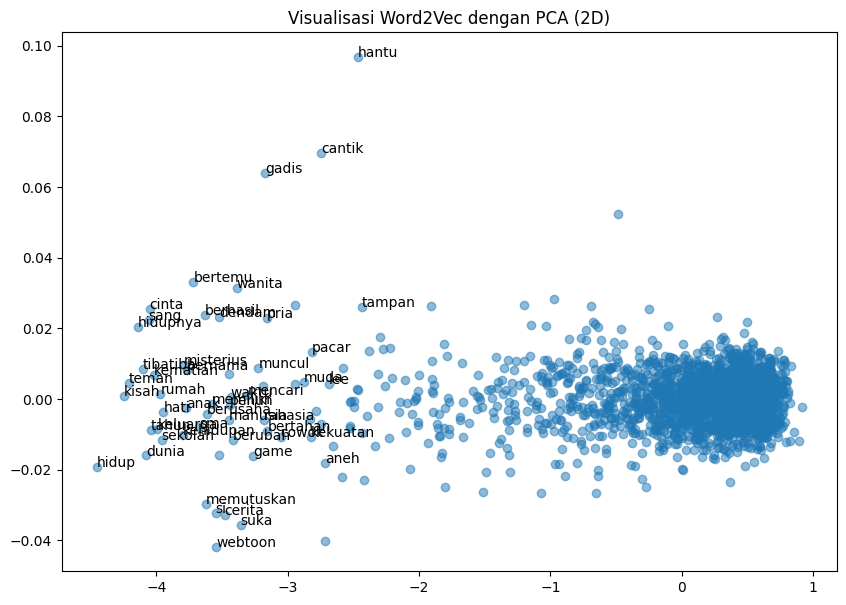

In [ ]:
from sklearn.decomposition import PCA
import gensim

# Load your Word2Vec model (replace with the actual path)
model_wv = gensim.models.Word2Vec.load("webtoon_word2vec_gensim.model")

# Now use the loaded Word2Vec model for visualization
word_vectors = model_wv.wv[model_wv.wv.index_to_key]  # kumpulan semua vektor kata
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Ambil komponen PC1 dan PC2
x = pca_result[:, 0]
y = pca_result[:, 1]

plt.figure(figsize=(10, 7))
plt.scatter(x, y, alpha=0.5)

# Tambahkan label untuk beberapa kata (misal kata yang paling sering muncul)
for i, word in enumerate(model_wv.wv.index_to_key[:50]):  # 50 kata teratas
    plt.annotate(word, xy=(x[i], y[i]))

plt.title("Visualisasi Word2Vec dengan PCA (2D)")
plt.show()